# (Ford GoBike System Data)
## by (Abdullah Adel )

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load in the dataset into a pandas dataframe
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### OK!!!
There are many actions needed to make our data tidy and clean. 

In [5]:
#first thing droping all null rows
gobike.dropna(inplace=True)
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


#### Calculating the trip distance from longitudnal and latitudnal lines

In [6]:
#Its better to calaulate the distance between the starting and ending stations from the langitude and latitude and drop them
from math import sin, cos, sqrt, atan2

R = 6373.0
dlon = gobike.end_station_longitude - gobike.start_station_longitude
dlat = gobike.end_station_latitude - gobike.start_station_latitude
a = (np.sin(dlat/2))**2 + np.cos(gobike.start_station_latitude) * np.cos(gobike.end_station_latitude) * (np.sin(dlon/2))**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
gobike['distance(km)'] = R * c
gobike.drop(['end_station_longitude','start_station_longitude', 'end_station_latitude', 'start_station_latitude'], inplace=True, axis=1)

In [7]:
#It better to set an age column instead of the birth year
gobike['age'] = 2021 - gobike['member_birth_year']
gobike.drop('member_birth_year', inplace=True, axis=1)

In [8]:
#changing the duration unite to be in minutes
gobike.rename(columns={'duration_sec':'duration_min'}, inplace=True)
gobike.duration_min = gobike.duration_min / 60

In [9]:
#Converting the date columns from string form to a datetime, so mathimatical operation could be done if needed
from datetime import *
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

#getting the statrting and the ending hours
gobike['starting_hour'] = gobike['start_time'].dt.hour
gobike['ending_hour'] = gobike['end_time'].dt.hour

In [10]:
gobike.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance(km),age,starting_hour,ending_hour
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,32.266374,37.0,17,8
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,176.721819,49.0,12,5
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,17.306748,32.0,17,4
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,164.004984,47.0,23,0
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,199.317120,62.0,23,0


>I think we all done in cleaning, may we discover more issues in visualization part like outliers or some thing, Lets see

In [11]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
duration_min               174952 non-null float64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
distance(km)               174952 non-null float64
age                        174952 non-null float64
starting_hour              174952 non-null int64
ending_hour                174952 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(3), object(5)
memory usage: 21.4+ MB


### What is the structure of your dataset?

> We are have a 174952 trips, with 13 columns each, numeric like(duration, starting and ending time, start and end station id, bike id, distance and age), categorical like (start and end station name, member gender, user type and bike share for all trip)

### What is/are the main feature(s) of interest in your dataset?

> 1- Starting time, to get the rush hour in each day.<br>
> 2- The most common starting and ending stations and see, if it can flow.<br>
> 3- The common gender so we may paint the bikes dependent on that.<br>
> 4- The common user type.<br>  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Actualy the all features are useful as there is no one or two specific features we are interested in. 

## Univariate Exploration

I will start with distribution of the starting hour to get the rush segmant

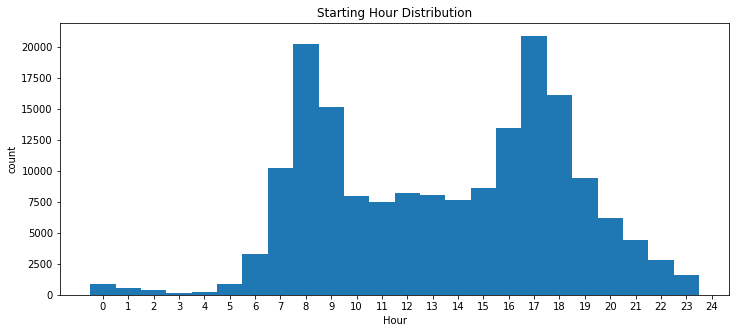

In [12]:
bins = np.arange(0, 24+1, 1)
plt.figure(figsize=[12, 5])
plt.hist(data = gobike, x = 'starting_hour', bins = bins)
plt.xlabel('Hour')
plt.ylabel('count')
labels = ['{}'. format(v) for v in bins]
ticks = bins+0.5
plt.xticks(ticks, labels)
plt.title('Starting Hour Distribution')
plt.show()

we can see that we have two peaks at 8 and 17, ***let see the distribution of end time, and see if there is any relationship in between.***

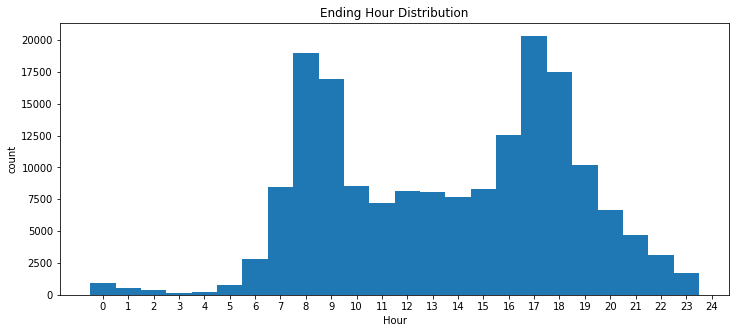

In [13]:
bins = np.arange(0, 24+1, 1)
plt.figure(figsize=[12, 5])
plt.hist(data = gobike, x = 'ending_hour', bins = bins)
plt.xlabel('Hour')
plt.ylabel('count')
plt.title('Ending Hour Distribution')
labels = ['{}'. format(v) for v in bins]
ticks = bins+0.5
plt.xticks(ticks, labels)
plt.show()

It seems like the most rides ends within an hour, lets see the duration distribution and check

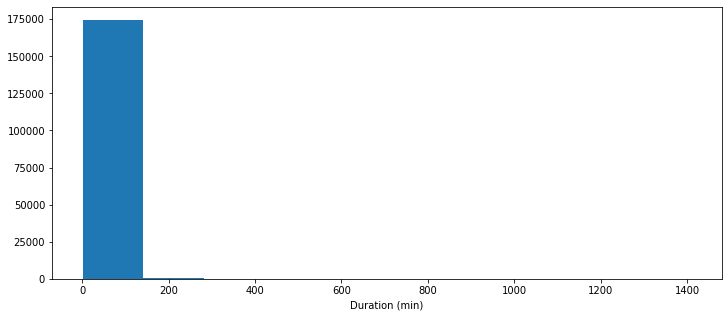

In [14]:
plt.figure(figsize=[12, 5])
plt.hist(data = gobike, x = 'duration_min')
plt.xlabel('Duration (min)')
plt.show()

lets limit distribution untill we get the most meanigful plot

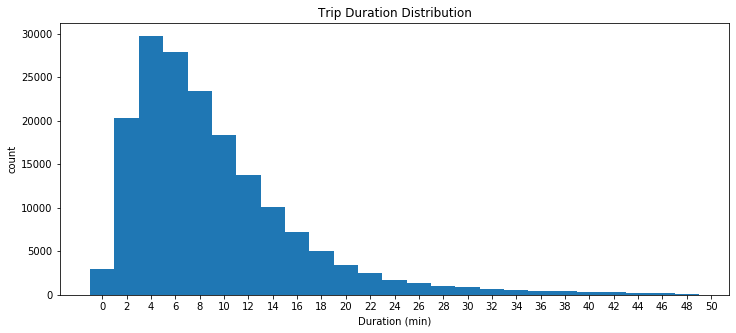

In [15]:
bins = np.arange(0, 50+2, 2)
plt.figure(figsize=[12, 5])
plt.hist(data = gobike, x = 'duration_min', bins = bins)
plt.xlabel('Duration (min)')
plt.ylabel('count')
plt.title('Trip Duration Distribution')
labels = ['{}'. format(v) for v in bins]
ticks = bins+1
plt.xticks(ticks, labels)
plt.show()

It clear that the duration distribution is Right_skewed at a peak of 4 minutes trip<br>
***lets see the distance***

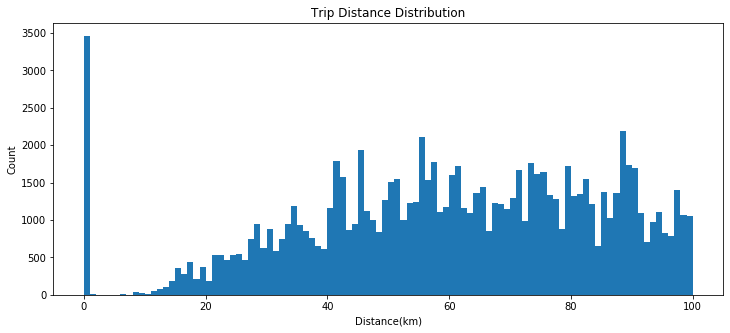

In [16]:
plt.figure(figsize=[12, 5])
bins = np.arange(0, 100+1, 1)
plt.hist(data = gobike, x = 'distance(km)', bins=bins)
plt.xlabel('Distance(km)')
plt.ylabel('Count')
plt.title('Trip Distance Distribution')
plt.show()

>we can see a great peak for the distance under 1 km, lets get a better look for it<br>
<br>

***lets see the top 10 starting and ending time of the year***

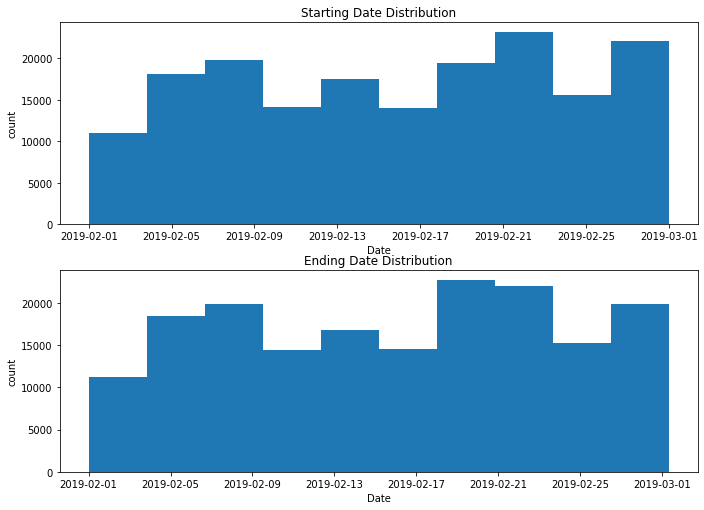

In [43]:
plt.figure(figsize = [10, 7])
plt.subplot(2, 1, 1) 
plt.hist(data=gobike, x='start_time');
plt.title('Starting Date Distribution')
plt.xlabel('Date')
plt.ylabel('count')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.tight_layout()
plt.hist(data=gobike, x='end_time');
plt.xlabel('Date')
plt.ylabel('count')
plt.title('Ending Date Distribution');

>The distributions seem alike as expected

<br>

***Lets see the most frequented stationts to start from and end to***

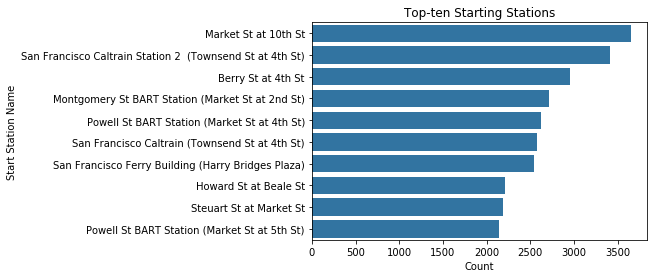

In [45]:
top_10_s = list(gobike.start_station_name.value_counts().index[0:10])
default_color = sb.color_palette()[0]
sb.countplot(data = gobike[gobike['start_station_name'].isin(top_10_s)], y = 'start_station_name', color = default_color, order=top_10_s )
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top-ten Starting Stations')
plt.show()

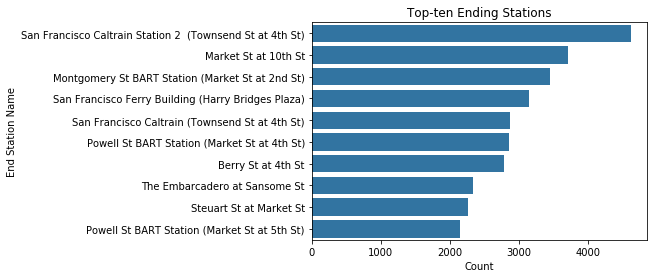

In [46]:
top_10_e = list(gobike.end_station_name.value_counts().index[0:10])
sb.countplot(data = gobike[gobike['end_station_name'].isin(top_10_e)],  y= 'end_station_name', color = default_color, order = top_10_e )
plt.ylabel('End Station Name')
plt.xlabel('Count')
plt.title('Top-ten Ending Stations')
plt.show()

It seems like it doesnot need external effort to redistribute the bikes on the stations 

***let see the user type and gender***

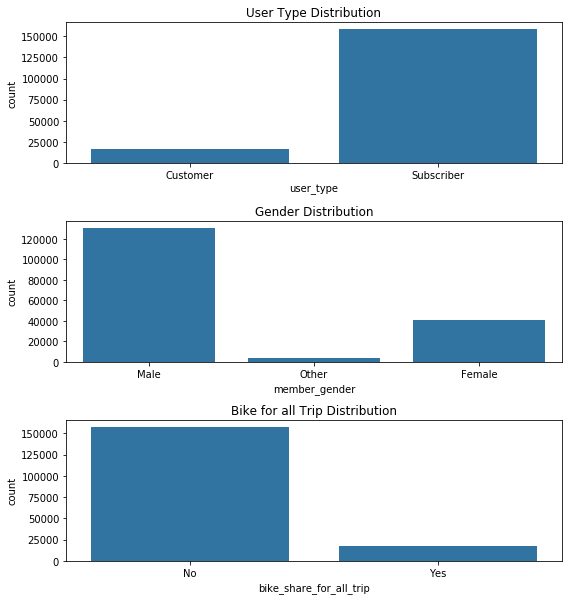

In [56]:
plt.figure(figsize = [8, 8])
plt.subplot(3, 1, 1)
default_color = sb.color_palette()[0]
sb.countplot(data = gobike, x = 'user_type', color = default_color)
plt.title('User Type Distribution');
plt.tight_layout()
plt.subplot(3, 1, 2)
sb.countplot(data = gobike, x = 'member_gender', color = default_color)
plt.title('Gender Distribution');
plt.tight_layout()
plt.subplot(3, 1, 3)
sb.countplot(data = gobike, x = 'bike_share_for_all_trip', color = default_color)
plt.title('Bike for all Trip Distribution');

>It is clear that the subscribers uses the gobike more aswell the males, and the most not uses the bike for all trip

***The Age Distribution***

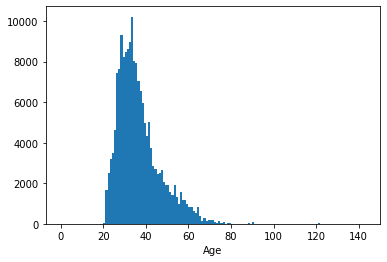

In [20]:
bins = np.arange(0, gobike.age.max()+1, 1)
plt.hist(data=gobike, x='age', bins=bins);
plt.xlabel('Age')
plt.show()

***lets replot the age with some limits from 20 to 60 with steps of 5 years each, to get a better insights***

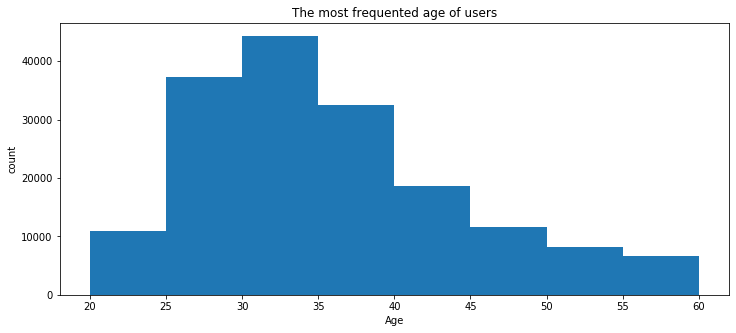

In [21]:
plt.figure(figsize=[12, 5])
bins = np.arange(20, 60+5, 5)
plt.hist(data=gobike, x='age', bins=bins)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('The most frequented age of users')
plt.show()

>We have a one peak at the age of thirties

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>First thing we looked at the rush hours, and it's 8AM and 8PM, which interesting, it seems like that assocaited with something that usually occures, we aslo found that most of rides ends with in an hour, which means short distance rides,<br> 
The most frequent stations are interchangable from starting and ending station, so we donot have to redistribute the bike on the stations after a while.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data has a wide range in (memeber age, ride duration, and ride distance) so we limit the distribution so we can see the peaks clearly 

## Bivariate Exploration


**Lets start with the Time of the year**

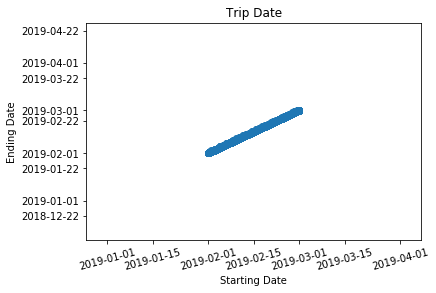

In [22]:
plt.scatter(data=gobike, x='start_time', y='end_time')
plt.xlabel('Starting Date')
plt.ylabel('Ending Date')
plt.title('Trip Date')
plt.xticks(rotation=15);

> As excpected before, the rides end within a day



***Lets see the specific difference between statring and ending time***

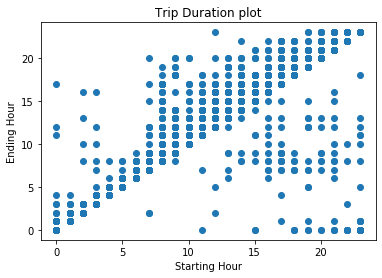

In [23]:
plt.scatter(data=gobike, x='starting_hour', y='ending_hour')
plt.xlabel('Starting Hour')
plt.ylabel('Ending Hour')
plt.title('Trip Duration plot')
plt.show()

>IT seems that the most of rides ends within an hour represented be linear pointed line, and the rest having longer trips 



***Lets see if the duration of the tirp depends on the user age or not***

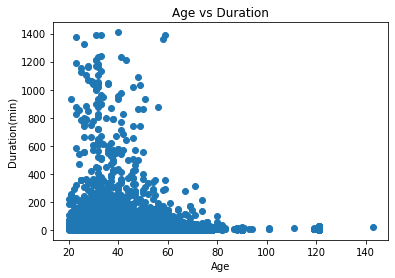

In [24]:
plt.scatter(data=gobike, x='age', y='duration_min')
plt.xlabel('Age')
plt.ylabel('Duration(min)')
plt.title('Age vs Duration')
plt.show()

>It seems right, that the younger users more probable to  have longer trip


***Lets see which gender crossponsenig to each using type***

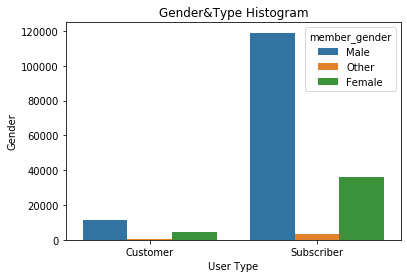

In [25]:
sb.countplot(data = gobike, x = 'user_type', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Gender')
plt.title('Gender&Type Histogram')
plt.show()

>It seems that the most users are subscribers independed on the gender


***Lets see the Age vs Gender***

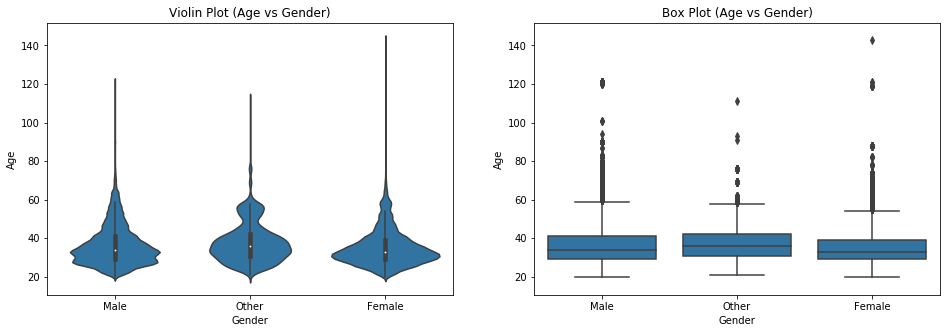

In [26]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=gobike, x='member_gender', y='age', color=base_color, innner='quartile')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Violin Plot (Age vs Gender)')
# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=gobike, x='member_gender', y='age', color=base_color)
plt.ylim(ax1.get_ylim()); 
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Box Plot (Age vs Gender)')
plt.show()

>It seems that the most of users of the same age, independent of the gender


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1-As we expected before almost all rides ends within a day.<br>
2-Most of rides end within an hour, and a few that exceed that.<br>
3-It seems right, that the younger users more probable to have longer trip<br>
4-It seems that the most users are subscribers independed on the gender<br>
5-It seems that the most of users of the same age, independent of the gender<br>


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>My point of view is, there is not a specific feature(s) to interest in, rather getting a clear look about the whole features, makeing a good insights about the trips and the users.

## Multivariate Exploration

***Lets start with age vs duratoin wthi gender color incodeing.***

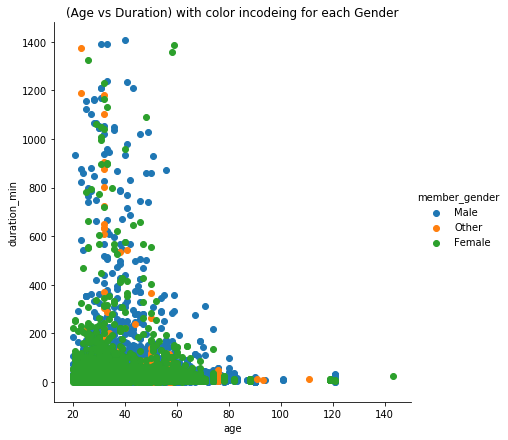

In [51]:
g = sb.FacetGrid(data = gobike, hue = 'member_gender', height=6)
bins = np.arange(20,60+5,5)
g.map(plt.scatter, 'age', 'duration_min')
g.add_legend()
plt.title('(Age vs Duration) with color incodeing for each Gender')
plt.show()

>It obvious that males under sixty, have a higher probability of longer trips

***Lets incode the user type instead***

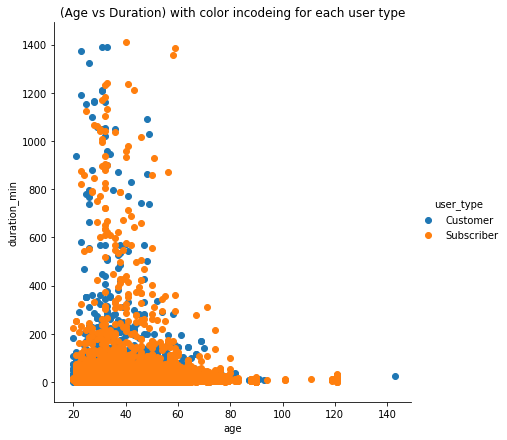

In [52]:
g = sb.FacetGrid(data = gobike, hue = 'user_type', height = 6)
g.map(plt.scatter, 'age', 'duration_min')
g.add_legend()
plt.title('(Age vs Duration) with color incodeing for each user type')
plt.show()

>It might tell there is no difference in the user type on the duration and the age

***Lets incode the user type instead***

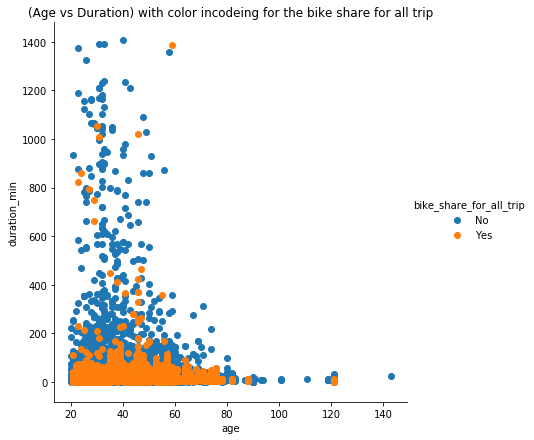

In [53]:
g = sb.FacetGrid(data = gobike, hue = 'bike_share_for_all_trip', height = 6)
g.map(plt.scatter, 'age', 'duration_min')
g.add_legend()
plt.title('(Age vs Duration) with color incodeing for the bike share for all trip')
plt.show()

>It seems like shorter trips independent of the user age, has more probability to use the bike share for all trip

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1-It obvious that males under sixty, have a higher probability of longer trips<br>
2-The type of the user does not effect the duration <br>
3-The shorter trips independent of the user age, has more probability to use the bike share for all trip<br>

### Were there any interesting or surprising interactions between features?

>We saw that all the assumptions we conclude in the univariate and bivariate is now proved.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!